## Importing the Dataset

In [77]:

import pandas as pd        # For handling tabular data (DataFrame operations, reading Excel/CSV files)
import numpy as np         # For numerical operations and array manipulations (used in calculations and ML pipelines)
import matplotlib.pyplot as plt  # For creating visualizations like histograms, bar charts, ROC curves
import seaborn as sns      # For advanced and attractive statistical plots (heatmaps, distribution plots)


In [78]:
# importing the dataset for preprocessing and anlysis
df = pd.read_excel("default of credit card clients.xls")

## Data Description

In [79]:
df.head() #prints the first 5 rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [81]:
print(df.shape)  # Displays the dimensions of the DataFrame as a tuple (rows, columns).

(30000, 25)


In [82]:

print(df.info())  # Prints a concise summary of the DataFrame:
# - Number of entries (rows) and columns
# - Column names and their data types (int64, float64, object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [83]:
df.columns #shows all the column names in the dataset

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [84]:
print(df.columns.tolist()) # converts the column name into a list 

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [85]:
df.describe(include="all").T  # Generates descriptive statistics for all columns and transposes the output

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Data Prepration and Preprocessing

In [116]:

df.rename(columns={'default payment next month': 'default'}, inplace=True) 
# Renames the target column to 'default' for easier reference in code.
# This is helpful because the original name has spaces, which can cause issues
# when accessing the column using dot notation or in modeling pipelines.
# 'inplace=True' ensures the change is applied directly to the DataFrame without creating a copy.


In [86]:
# Calculates the number of missing (NaN) values in each column
missing = df.isna().sum().sort_values(ascending=False)
print(missing)

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [87]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [92]:
# Counts the frequency of each unique value in the column.
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [94]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)  # Replaces invalid or rare education codes (0, 5, 6) with 4 (others category).
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)         # Replaces invalid marriage code (0) with 3 (others category).

In [95]:
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


## Data Analysis

In [97]:

from sklearn.preprocessing import StandardScaler  # Imports scaler for standardizing features (zero mean, unit variance)

scalar = StandardScaler()                         # Initializes the scaler object (note: name 'scalar' is fine, commonly 'scaler')

scaled_features = scalar.partial_fit(             # Computes running (incremental) mean/variance on features
    df.drop('default', axis=1)                   # Drops the target column 'default' so only predictors are scaled
)                                                # Using partial_fit allows streaming/mini-batch updates instead of a full fit


In [98]:
df['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

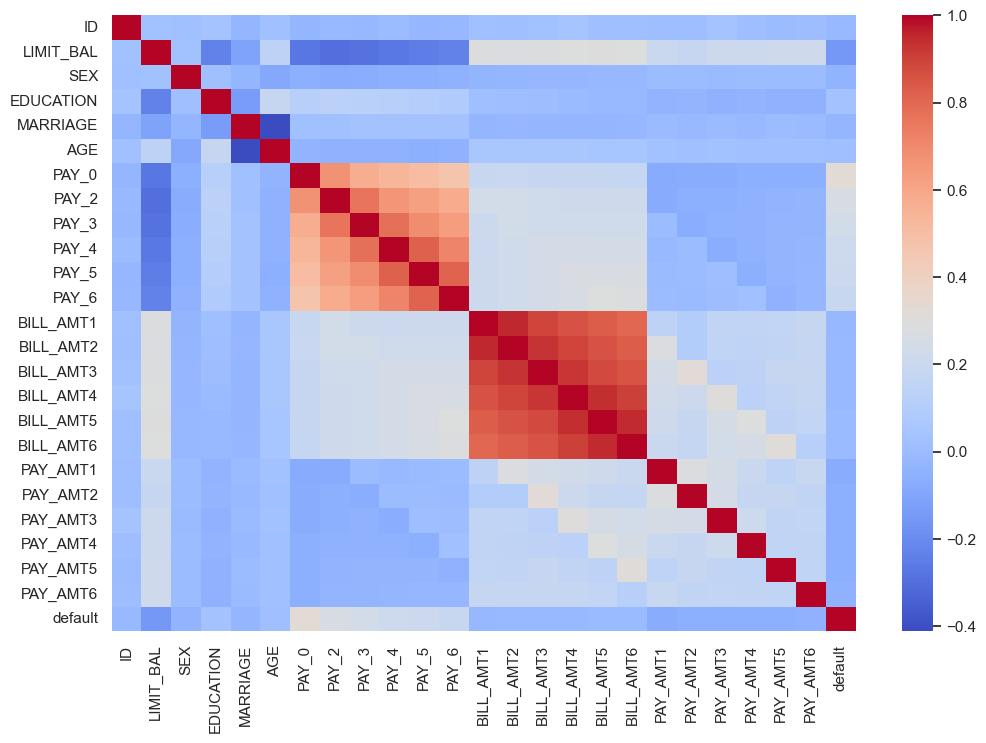

In [99]:

plt.figure(figsize=(12,8))                     # Creates a new figure with a custom size (12 inches wide, 8 inches tall)
sns.heatmap(df.corr(), cmap='coolwarm')        # Plots a heatmap of the correlation matrix of the DataFrame:
plt.show()                                     # Displays the heatmap plot on the screen
                                               # This helps identify relationships between features (e.g., bill amounts vs payments)


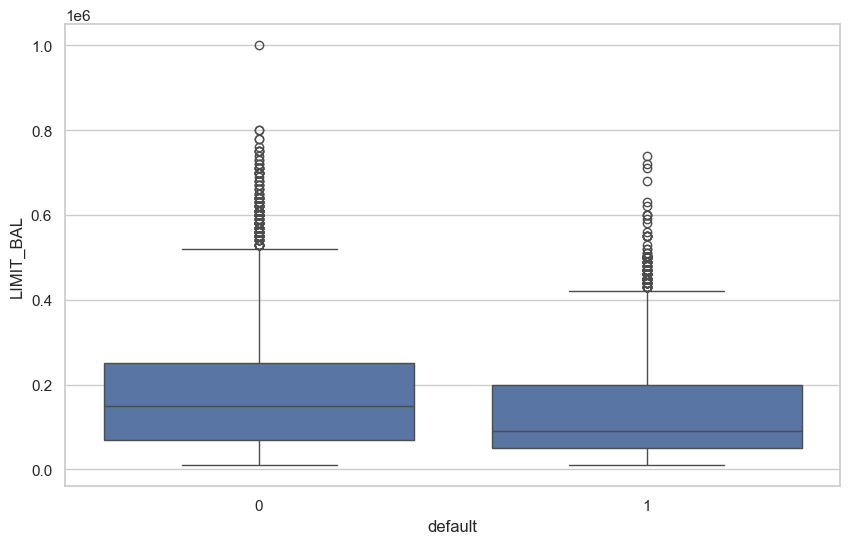

In [100]:

sns.boxplot(x='default', y='LIMIT_BAL', data=df)  # Creates a boxplot to compare the distribution of credit limits (LIMIT_BAL)
plt.show()                                                  # across the two target classes: 'default' (0 = no default, 1 = default).

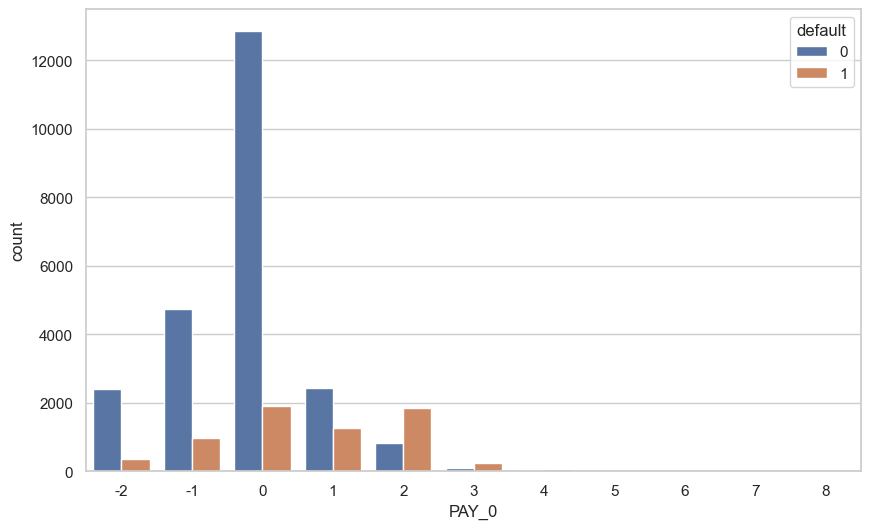

In [101]:

sns.countplot(x='PAY_0', hue='default', data=df)  # Creates a count plot showing the frequency of each 'PAY_0' value
                                                  # (payment status for the most recent month) grouped by 'default' status.
                                                  # 'hue="default"' adds color separation for default vs non-default clients,
plt.show()

## Supervised Learning (Using Logistic Regression)

In [102]:

from sklearn.model_selection import train_test_split  # Imports function to split data into training and testing sets

x = df.drop('default', axis=1)  # Creates feature matrix by dropping the target column 'default'
y = df['default']               # Creates target vector containing default status (0 or 1)

# Splits data into train and test sets:
# - test_size=0.2 → 20% of data for testing, 80% for training
# - random_state=42 → ensures reproducibility of the split
# - stratify=y → maintains the same proportion of default vs non-default in both train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [103]:

from sklearn.linear_model import LogisticRegression  # Imports Logistic Regression model for binary classification tasks

model = LogisticRegression(max_iter=1000)           # Initializes the model:
                                                    # - max_iter=1000 ensures enough iterations for convergence
                                                    #   (default is 100, which may be too low for large datasets)

model.fit(x_train, y_train)                         # Trains the Logistic Regression model using the training data:
                                                    # - x_train: feature matrix
                                                    # - y_train: target labels (default status)
                                                    # After fitting, the model learns coefficients for each feature
                                                    # to predict the probability of default.


C:\Users\RUKAUSHI\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Model Evaluation and Scores

In [104]:

from sklearn.metrics import (classification_report, confusion_matrix,        # classification_report: summary of precision, recall, F1 for each class
                             roc_auc_score, roc_curve, precision_recall_curve, # roc_auc_score: evaluates model's ability to rank positives higher than negatives
                             average_precision_score, accuracy_score,          # roc_curve & precision_recall_curve: generate data for ROC and PR plots
                             precision_score, recall_score, f1_score)          # average_precision_score: summarizes PR curve; accuracy, precision, recall, F1: key


In [105]:
y_pred = model.predict(x_test)                 # Predicted class labels (0/1) for the test set, based on the learned decision boundary.
y_pred_prob = model.predict_proba(x_test)[:, 1]  # Predicted probability of the positive class (default=1); used for ROC/PR curves and threshold tuning.

In [106]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

[[4493  180]
 [1000  327]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4673
           1       0.64      0.25      0.36      1327

    accuracy                           0.80      6000
   macro avg       0.73      0.60      0.62      6000
weighted avg       0.78      0.80      0.77      6000

Accuracy: 0.8033333333333333
Precision: 0.6449704142011834
Recall: 0.24642049736247174
F1 Score: 0.35659760087241005
ROC-AUC Score: 0.6867110536228339


## Unsupervised Learning (Using KMeans Clustering)

In [109]:

from sklearn.preprocessing import StandardScaler, LabelEncoder  # - StandardScaler: for scaling numeric features to zero mean and unit variance
                                                                # - LabelEncoder: for converting categorical labels into numeric codes (e.g., text → integers)
label_encoder = LabelEncoder()  # Initializes a LabelEncoder instance, typically used to encode target labels or categorical features

In [110]:
# Encode the categorical column as integer labels (e.g., {'F': 0, 'M': 1})
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['EDUCATION'] = label_encoder.fit_transform(df['EDUCATION'])
df['MARRIAGE'] = label_encoder.fit_transform(df['MARRIAGE'])

In [111]:
X = df.drop(columns=['default'])  # Drop target column for unsupervised tasks
y = df['default']  # Target column, but we won't use it in unsupervised learning

# Standardize the numerical features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit model on scaled data
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


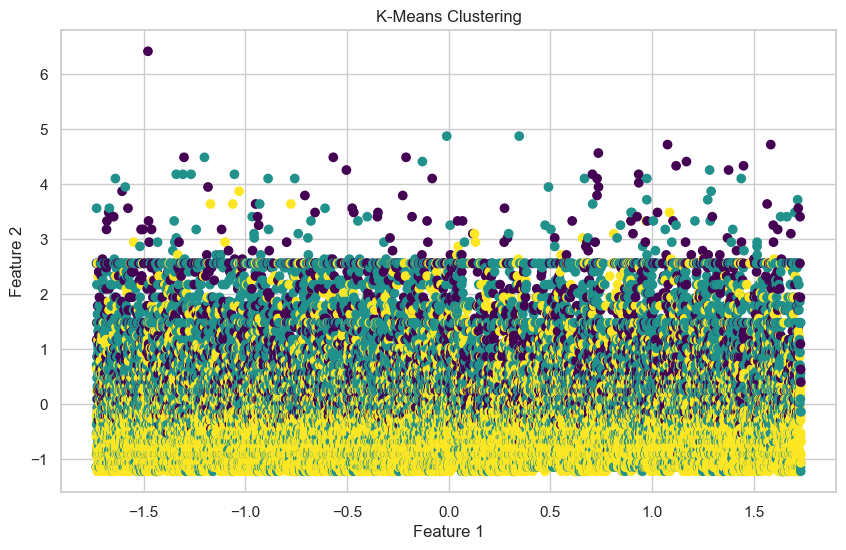

In [113]:

# Store cluster assignments from the fitted KMeans (one label per row in X_scaled)
df['Cluster'] = kmeans.labels_

# Scatter plot of first two features; color points by assigned cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')

# Axis labels for readability (rename if these features have real names)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Quick visual check of cluster separation
plt.title('K-Means Clustering')
plt.show()


In [114]:
# Print the coordinates of cluster centers (centroids in feature space)
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Centers: [[ 0.06311246  0.89495919 -0.06645368 -0.08470854 -0.10208035  0.16669186
   0.23862584  0.29547083  0.30098569  0.31655898  0.34734862  0.36901794
   2.02264889  2.0804395   2.09764662  2.1273065   2.10426121  2.05609341
   0.6483095   0.50770311  0.5666458   0.53842678  0.53598837  0.468825  ]
 [-0.00807032  0.4089935   0.08947975 -0.23446671 -0.08826824  0.10102658
  -0.66508781 -0.84618293 -0.88304992 -0.89376546 -0.88738129 -0.85193961
  -0.55768312 -0.58148236 -0.58035233 -0.57672793 -0.55871681 -0.54303812
  -0.04760606 -0.02053025 -0.00827156  0.00458406  0.0022818   0.01722554]
 [-0.00890332 -0.47376849 -0.04439069  0.1748075   0.08166947 -0.10474001
   0.38764077  0.4950276   0.51825799  0.52185316  0.51065717  0.48223033
  -0.08679723 -0.0840553  -0.08869379 -0.09780224 -0.10455263 -0.10407763
  -0.11489013 -0.10109379 -0.12255163 -0.12471011 -0.1226306  -0.11737529]]


## Model Evaluation

In [115]:

from sklearn.metrics import silhouette_score

# Fit KMeans and get cluster labels in one step (refits the model)
clusters = kmeans.fit_predict(X_scaled)

# Save labels to the DataFrame for reference/analysis
df['cluster'] = clusters

# Measure cluster separation/compactness (range: -1 to 1; higher is better)
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.17228724147443847


# Other Statistical Anlysis

In [117]:
# Chi-Square Test

from scipy.stats import chi2_contingency

# Build contingency table of counts: EDUCATION (rows) vs default (columns)
contingency = pd.crosstab(df['EDUCATION'], df['default'])

# Chi-square test of independence: tests whether EDUCATION and default are related
chi2, p, dof, expected = chi2_contingency(contingency)

# Test statistic (larger => more deviation from independence)
print("Chi-square:", chi2)

# P-value (small p => reject independence; common alpha = 0.05)
print("P-value:", p)


Chi-square: 160.40995107224546
P-value: 1.4950645648106153e-34


In [118]:
# Hypothesis Testing

from scipy.stats import ttest_ind

# Split LIMIT_BAL by default status (1 = defaulted, 0 = not)
default_yes = df[df['default'] == 1]['LIMIT_BAL']
default_no  = df[df['default'] == 0]['LIMIT_BAL']

# Two-sample t-test for difference in means between groups
# Note: by default assumes equal variances; use equal_var=False for Welch's t-test
t_stat, p_value = ttest_ind(default_yes, default_no)

print("T-statistic:", t_stat)   # Effect direction/magnitude (in SD units)
print("P-value:", p_value)      # Small p => significant difference in means


T-statistic: -26.908521684796522
P-value: 1.3022439532597397e-157


In [119]:
# ANOVA Test

from scipy.stats import f_oneway

# Split LIMIT_BAL by EDUCATION categories (1–4)
edu1 = df[df['EDUCATION'] == 1]['LIMIT_BAL']
edu2 = df[df['EDUCATION'] == 2]['LIMIT_BAL']
edu3 = df[df['EDUCATION'] == 3]['LIMIT_BAL']
edu4 = df[df['EDUCATION'] == 4]['LIMIT_BAL']

# One-way ANOVA: tests if mean LIMIT_BAL differs across education groups
f_stat, p_value = f_oneway(edu1, edu2, edu3, edu4)

print("F-statistic:", f_stat)   # Larger F => more between-group variance vs within-group
print("P-value:", p_value)      # Small p => at least one group mean differs


F-statistic: nan
P-value: nan


C:\Users\RUKAUSHI\AppData\Local\Temp\ipykernel_21236\3675853698.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(edu1, edu2, edu3, edu4)


In [120]:
# Correlation Analysis

# Compute correlation of all numeric features with target 'default'
corr_with_target = df.corr()['default'].sort_values(ascending=False)

# Display correlations sorted by strength (highest to lowest)
print(corr_with_target)


default      1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
cluster      0.096702
Cluster      0.096702
EDUCATION    0.033842
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
ID          -0.013952
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.027575
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: default, dtype: float64
